In [29]:
# neccessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [3]:
# reading the data
data=pd.read_csv('../data/insuranceFraud.csv')

In [214]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [5]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [6]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [7]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [8]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [9]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [10]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [11]:
data

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,...,1,YES,0,1,NaN,87200,17440,8720,61040,N
996,285,41,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,...,1,YES,2,3,NaN,108480,18080,18080,72320,N
997,130,34,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,...,3,NaN,2,3,YES,67500,7500,7500,52500,N
998,458,62,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,...,1,NaN,0,1,YES,46980,5220,5220,36540,N


In [13]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn.impute import SimpleImputer

# Create an imputer for categorical data
imputer = SimpleImputer(strategy='most_frequent') 

In [16]:
# Impute missing values in each column
data['collision_type'] = imputer.fit_transform(data[['collision_type']]).flatten()
data['property_damage'] = imputer.fit_transform(data[['property_damage']]).flatten()
data['police_report_available'] = imputer.fit_transform(data[['police_report_available']]).flatten()

In [17]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

In [18]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [225]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [19]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [22]:
# Iterate through each column and print the unique values
for column in cat_df.columns:
    print(f"Column: {column} - Unique values: {data[column].unique()}")

Column: policy_csl - Unique values: ['250/500' '100/300' '500/1000']
Column: insured_sex - Unique values: ['MALE' 'FEMALE']
Column: insured_education_level - Unique values: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Column: insured_occupation - Unique values: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Column: insured_relationship - Unique values: ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
Column: incident_type - Unique values: ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Column: collision_type - Unique values: ['Side Collision' 'Rear Collision' 'Front Collision']
Column: incident_severity - Unique values: ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
Column: authorities_contacted - Uniqu

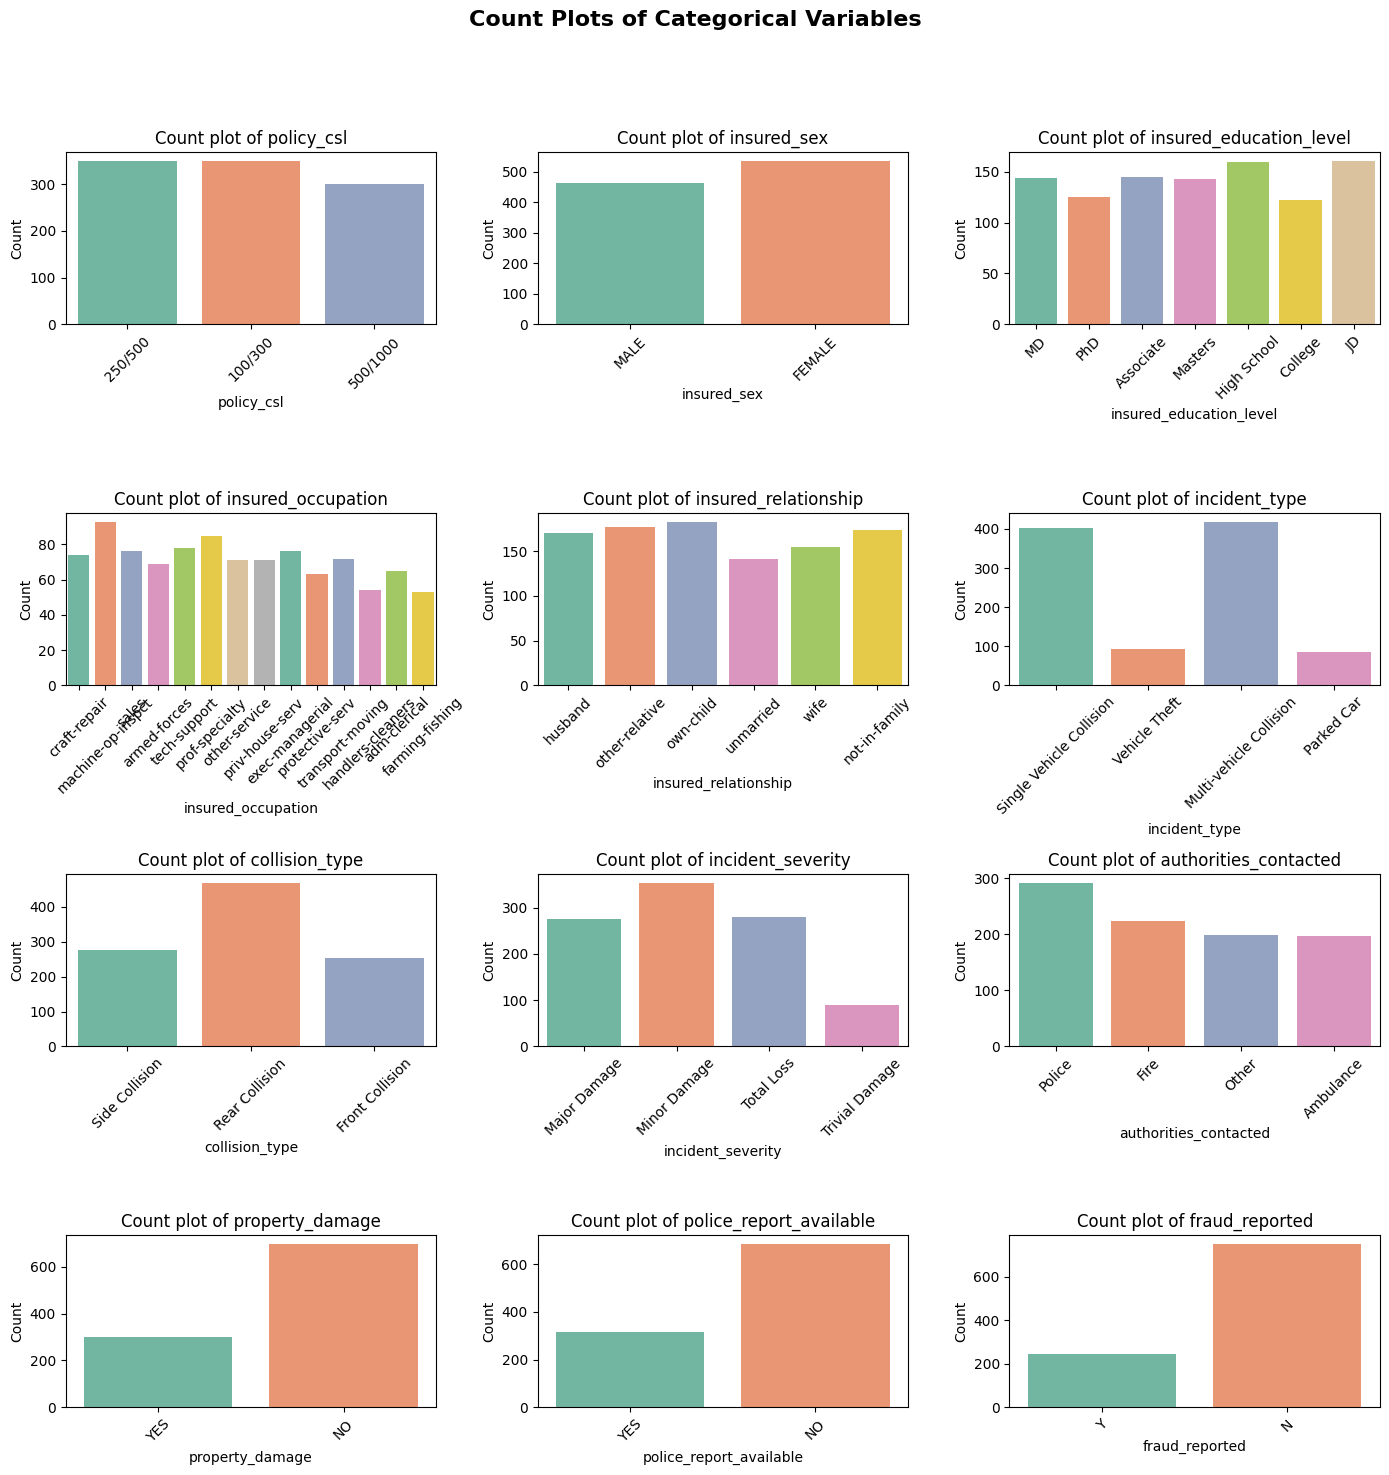

In [30]:
# Set up the figure size for the plots
plt.figure(figsize=(14, 14))

# Define a color palette for the plots
palette = 'Set2'  # You can use other palettes like 'Set1', 'coolwarm', 'pastel', etc.

# Add a main title for the whole figure
plt.suptitle('Count Plots of Categorical Variables', fontsize=16, fontweight='bold', y=1.05)

# Iterate through each column and plot a count plot
for i, column in enumerate(cat_df.columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns for the subplot grid
    sns.countplot(data=data, x=column, palette=palette)
    
    # Set individual plot title and labels
    plt.title(f"Count plot of {column}", fontsize=12)
    plt.xlabel(f'{column}', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust the layout to make sure everything fits
plt.tight_layout()
plt.show()

In [31]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [32]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [33]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,2.5,1,6,2,0,0,1,False,False,False,...,False,False,False,False,True,True,False,False,False,True
2,1.0,0,7,2,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2.5,0,7,3,0,0,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
4,5.0,1,5,2,0,0,0,False,False,False,...,True,False,False,False,True,True,False,False,False,False


In [34]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()

In [35]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [36]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [37]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [38]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,False,False,False,True,False,False,True,False,False,True
1,228,42,2000,5000000,0,0,8,1,0,0,...,False,False,False,False,True,True,False,False,False,True
2,134,29,2000,5000000,35100,0,7,3,2,3,...,False,False,False,False,False,True,False,False,False,True
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,True,False,False,True,False,False,False,False,False,True
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,True,False,False,False,True,True,False,False,False,False


In [39]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [40]:
import matplotlib.pyplot as plt
%matplotlib  inline

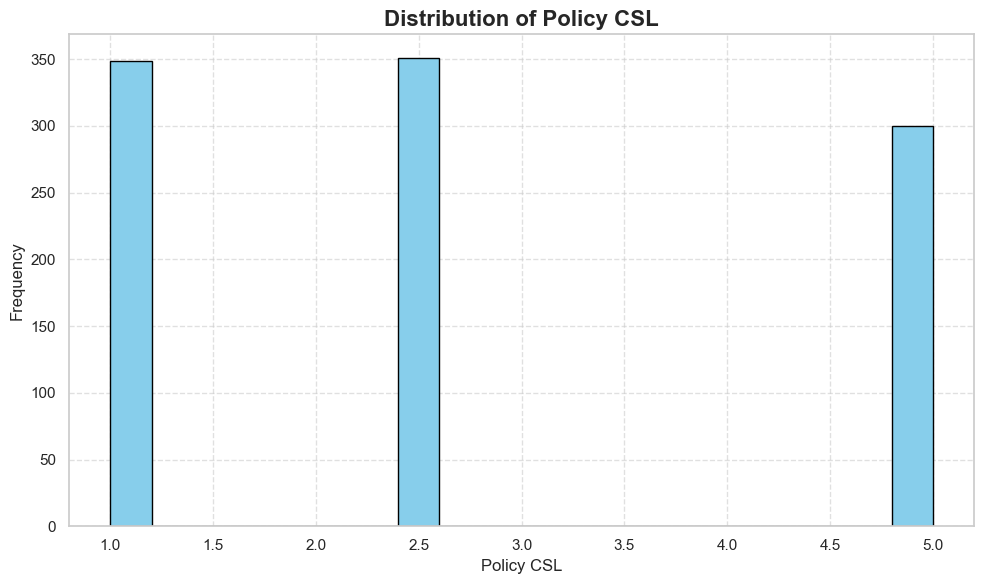

In [41]:
# we'll look at the distribution of data in some columns now
# Set the style for the plot
sns.set(style="whitegrid")  # Using seaborn's whitegrid style for cleaner appearance

# Plotting the histogram with more customization
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(final_df['policy_csl'], bins=20, color='skyblue', edgecolor='black')  # Customized color and edge

# Add titles and labels
plt.title('Distribution of Policy CSL', fontsize=16, fontweight='bold')
plt.xlabel('Policy CSL', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()
# we  can see that for almost all categories of CSL the data is uniformly distributed

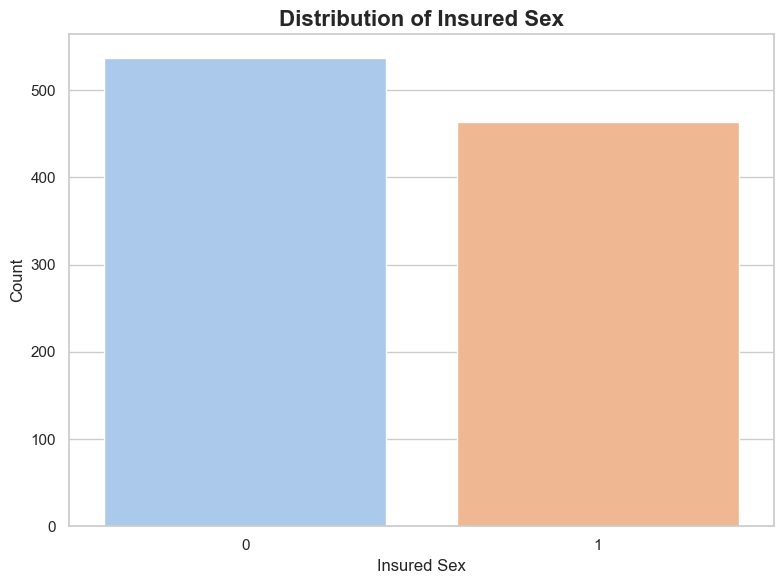

In [42]:
sns.set(style="whitegrid")

# Plotting the distribution of 'insured_sex' using a count plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.countplot(data=final_df, x='insured_sex', palette='pastel')

# Adding title and labels
plt.title('Distribution of Insured Sex', fontsize=16, fontweight='bold')
plt.xlabel('Insured Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

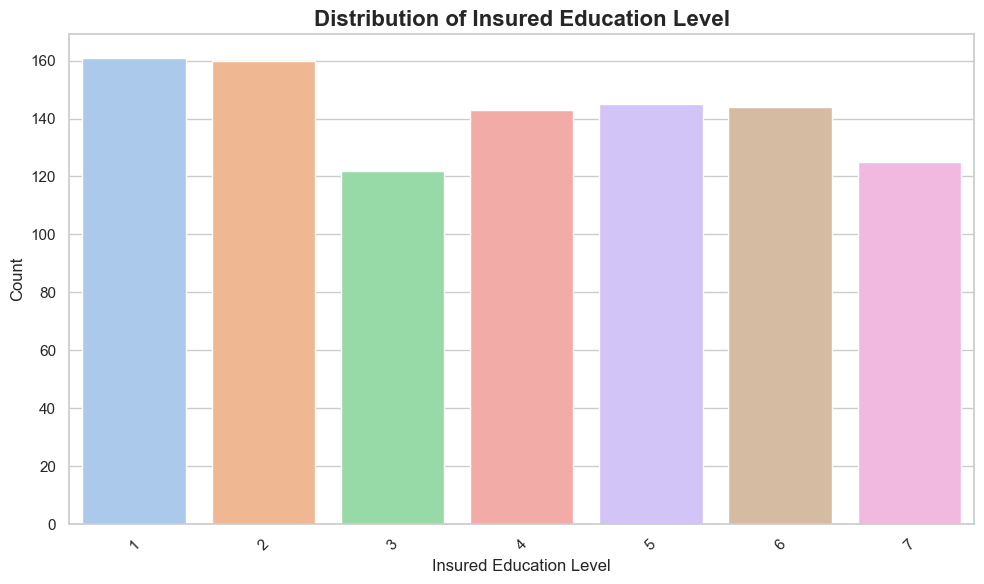

In [43]:
# Set the style for the plot
sns.set(style="whitegrid")

# Plotting the distribution of 'insured_education_level' using a count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(data=final_df, x='insured_education_level', palette='pastel')

# Adding title and labels
plt.title('Distribution of Insured Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Insured Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()
plt.show()
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

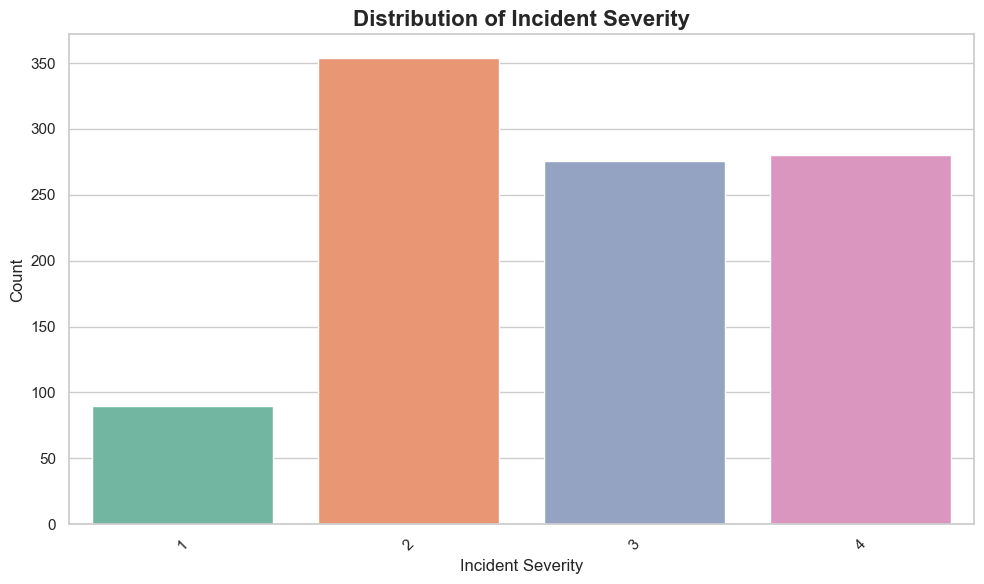

'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

In [44]:
# Plotting the distribution of 'incident_severity' using a count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.countplot(data=final_df, x='incident_severity', palette='Set2')

# Adding title and labels
plt.title('Distribution of Incident Severity', fontsize=16, fontweight='bold')
plt.xlabel('Incident Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()
plt.show()
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [45]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

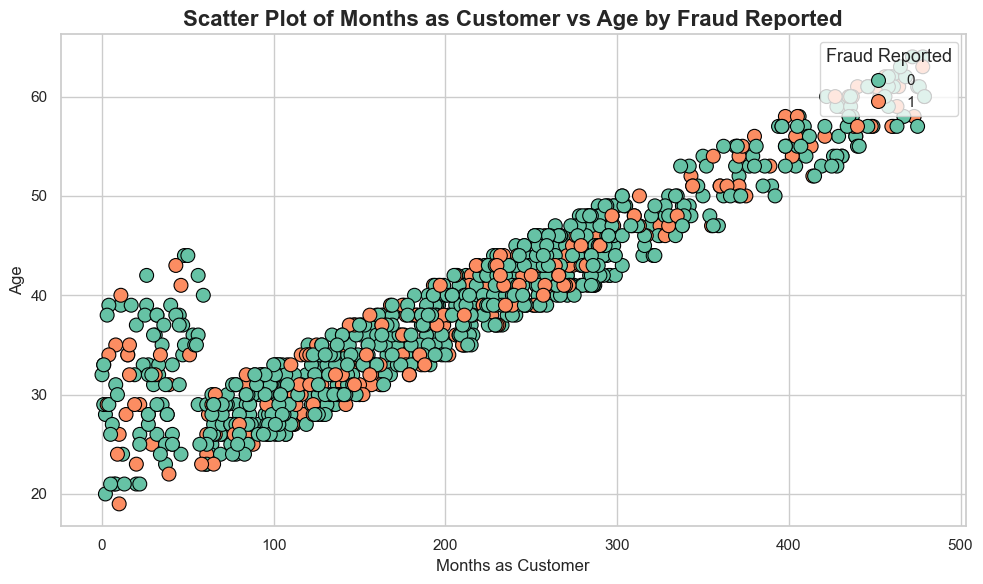

'\nfrom the graph it can be concluded that most of the fraud cases are done by the customers new \nto the company and that too comparatively younger ones. \n'

In [46]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.scatterplot(x=final_df['months_as_customer'], y=final_df['age'], hue=final_df['fraud_reported'], palette='Set2', s=100, edgecolor='black')

# Adding titles and labels
plt.title('Scatter Plot of Months as Customer vs Age by Fraud Reported', fontsize=16, fontweight='bold')
plt.xlabel('Months as Customer', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Adding a legend
plt.legend(title='Fraud Reported', title_fontsize='13', fontsize='11', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
"""
from the graph it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. 
"""

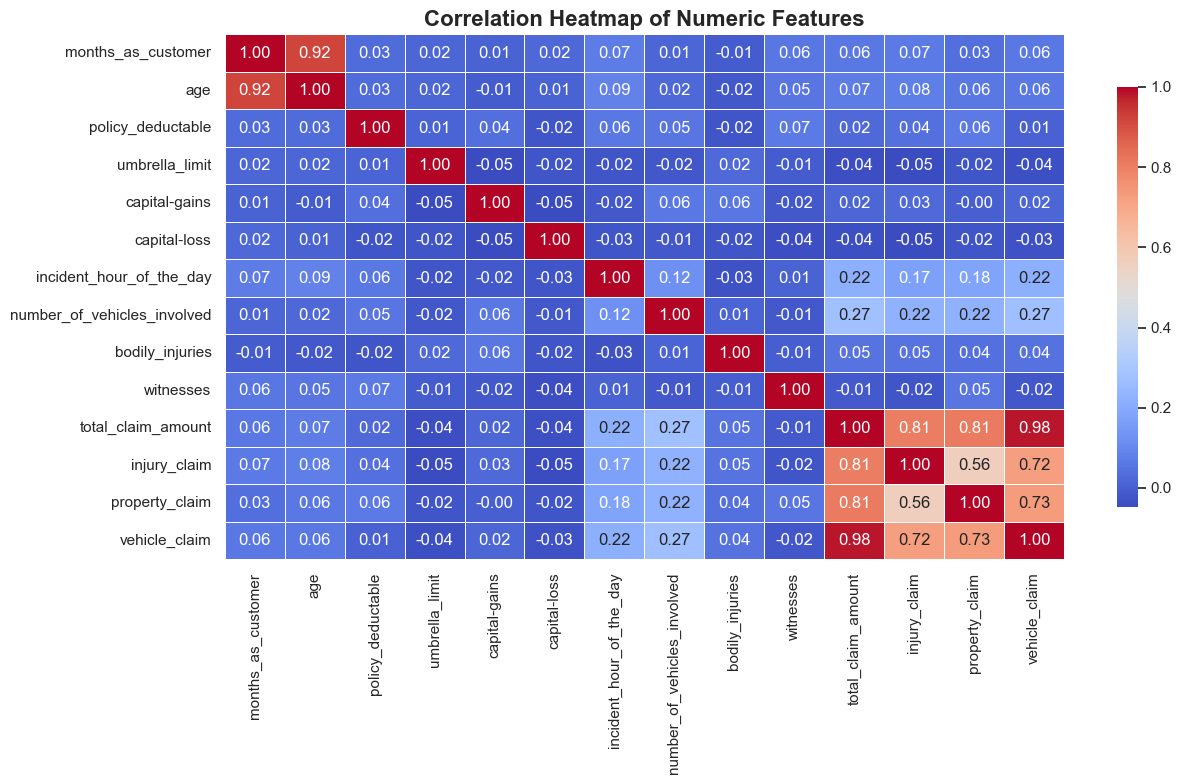

In [47]:
# Create the heatmap
plt.figure(figsize=(13, 8))  # Adjusting the figure size for better readability
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 12}, cbar_kws={'shrink': 0.8})

# Adding title and labels
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [48]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [49]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

In [50]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [51]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,False,False,False,False,False,False,False,False,False,False
244,95,1000,0,0,-70300,3,1,1,2,640,...,False,False,False,False,True,True,False,False,False,False
595,56,500,0,0,-28800,13,1,1,2,0,...,False,False,False,True,False,True,False,False,False,True
873,322,2000,0,0,-46000,18,1,0,2,7680,...,False,False,False,True,False,True,False,False,False,False
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,False,False,False,False,False,True,False,False,True,False


In [52]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [53]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [54]:
print(train_x.shape)
print(num_df.shape)

(750, 44)
(750, 12)


In [55]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [57]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [58]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

In [59]:
train_x.shape

(750, 32)

In [60]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
244,2.5,1,5,1,1,0,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
595,1.0,1,1,3,1,1,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
873,2.5,0,7,3,0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
631,5.0,0,5,4,0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [61]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


In [66]:
# Define models and hyperparameter grids
models = {
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

In [67]:
param_grids = {
    "SVM": {
        "kernel": ['rbf', 'sigmoid'],
        "C": [0.1, 0.5, 1.0],
        "random_state": [0, 100, 200, 300]
    },
    "Naive Bayes": {},  # Naive Bayes doesn't have hyperparameters that need tuning
    "Decision Tree": {
        "max_depth": range(2, 10),
        "criterion": ['gini', 'entropy'],
        "random_state": [0, 100, 200, 300]
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100, 150],
        "max_depth": range(2, 10),
        "criterion": ['gini', 'entropy'],
        "random_state": [0, 100, 200]
    },
    "XGBoost": {
        "n_estimators": [10, 50, 100, 130],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "random_state": [0, 100, 200]
    }
}


Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVM: {'C': 0.1, 'kernel': 'rbf', 'random_state': 0}
Training Naive Bayes...
Training Decision Tree...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 2, 'random_state': 0}
Training Random Forest...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 10, 'random_state': 100}
Training XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0}


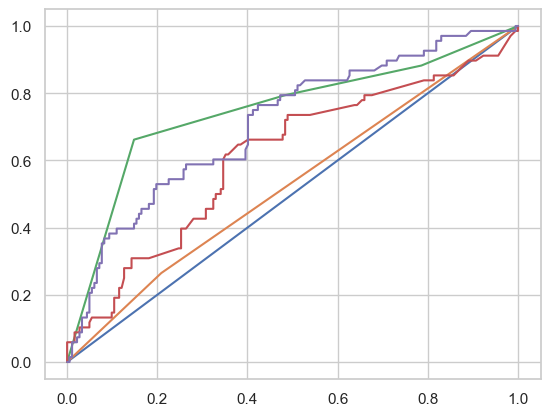

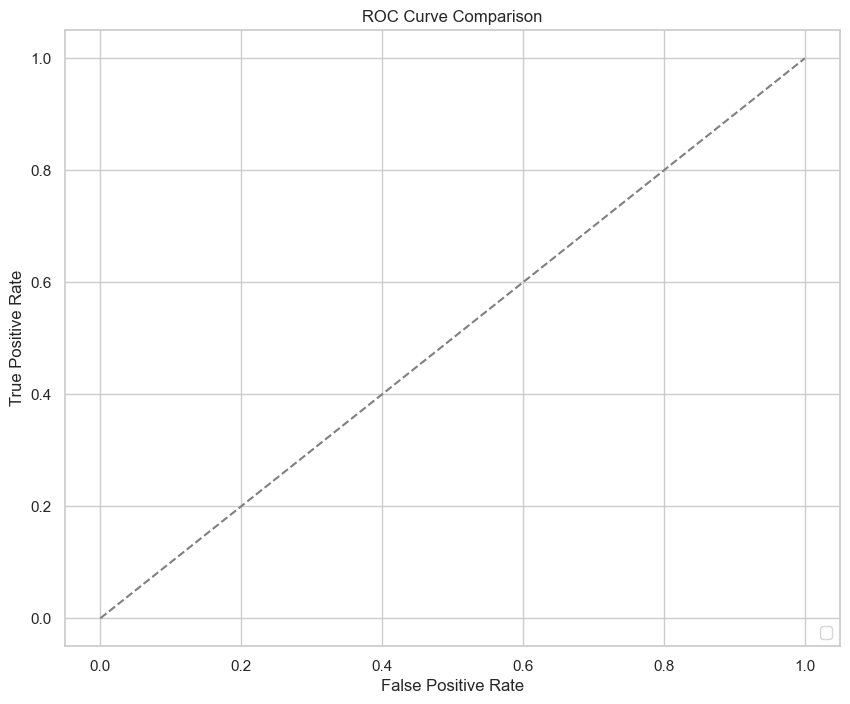

           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0            SVM     0.728   0.000000  0.000000  0.000000  0.500000   
1    Naive Bayes     0.648   0.321429  0.264706  0.290323  0.527957   
2  Decision Tree     0.800   0.625000  0.661765  0.642857  0.748061   
3  Random Forest     0.724   0.470588  0.117647  0.188235  0.612031   
4        XGBoost     0.752   0.593750  0.279412  0.380000  0.709518   

                                         Best Params  
0     {'C': 0.1, 'kernel': 'rbf', 'random_state': 0}  
1                                                N/A  
2  {'criterion': 'gini', 'max_depth': 2, 'random_...  
3  {'criterion': 'entropy', 'max_depth': 8, 'n_es...  
4  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...  


In [68]:
# Initialize lists to store results
results = []

# Loop over models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Hyperparameter tuning for SVM, Decision Tree, Random Forest, and XGBoost
    if param_grids.get(model_name):
        grid = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, verbose=3, n_jobs=-1)
        grid.fit(train_x, train_y)
        best_model = grid.best_estimator_
        print(f"Best Parameters for {model_name}: {grid.best_params_}")
    else:
        # For Naive Bayes, no hyperparameter tuning
        best_model = model
        best_model.fit(train_x, train_y)
    
    # Predict using the best model
    y_pred = best_model.predict(test_x)
    
    # Calculate metrics
    acc = accuracy_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred, average='binary')  # or 'macro'/'weighted' for multiclass
    recall = recall_score(test_y, y_pred, average='binary')
    f1 = f1_score(test_y, y_pred, average='binary')
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(test_y, best_model.predict_proba(test_x)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Best Params": grid.best_params_ if model_name != "Naive Bayes" else "N/A"
    })
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Show ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Convert results to a DataFrame for a clear overview
import pandas as pd
results_df = pd.DataFrame(results)

# Show results for comparison
print(results_df)

From the above model performance we can see that DecisionTree performing better than other algorithems

In [2]:
import joblib  # If model was saved using joblib
import pickle  # If model was saved using pickle

# Load the model (make sure to replace 'kmeans.sac' with the correct path if needed)
model_path = '../models/KMeans/kmeans.sav'

try:
    # Try to load with joblib
    kmeans_model = joblib.load(model_path)
    print("Model loaded using joblib.")
except:
    try:
        # If loading with joblib fails, try pickle
        with open(model_path, 'rb') as file:
            kmeans_model = pickle.load(file)
        print("Model loaded using pickle.")
    except Exception as e:
        print(f"Error loading the model: {e}")
        raise

# Print the parameters of the KMeans model
print("Model Parameters:")
print(kmeans_model.get_params())

# Check the number of parameters in the model
# This will list all the hyperparameters of the model
print("Number of parameters:", len(kmeans_model.get_params()))


Model loaded using joblib.
Model Parameters:
{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': np.int64(2), 'n_init': 'auto', 'random_state': 42, 'tol': 0.0001, 'verbose': 0}
Number of parameters: 9


In [3]:
kmeans_model.feature_names_in_

array(['policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative',
       'insured_relationship_own-child', 'insured_relationship_unmarried',
       'insured_relationship_wife', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_V

In [4]:
len(kmeans_model.feature_names_in_)

45